# Pet Classification using Support Vector Machine

`Author:` [Sagar Kanekar](https://github.com/TheShade1551)\
`Date:` 24.December.2024\
`Dataset:`[Asirra Dataset](https://www.kaggle.com/competitions/dogs-vs-cats/data)

### About Dataset(Meta Data)

#### Context:-
- Following Dataset is a Image Dataset of Collection of Photographs of Dogs & Cats of Different Breeds.
- This Dataset Contains a Total of 25,000 Photos Captured in a Variety of Environment, Resolutions & Subjects.

#### Content:-
- The 25,000 Images in this Datset Can be Classified as:
 1. Cat Photographs:- Quantity 12,500 | Named as cat._number_ ;number ε [0,12499]
 2. Dog Photographs:- Quantity 12,500 | Named as dog._number_ ;number ε [0,12499]

### Acknowledgements:-
- The **Asirra Dataset** used is the Subset of- **A**nimal **S**pecies **I**mage **R**ecognition for **R**estricting **A**ccess is Used as an **HIP** Dataset i.e. Human Interactive Proof or **CAPTCHA**.
- It Works by Asking Users to Identify the Photograph as Cat or Dog, A Task which Humans Can do Fast & Accurately while the is Difficult for Machines.
- **Assira Dataset** is Unique because it is Made in Partenership with [Petfinder](www.petfinder.com), the world's largest site devoted to finding homes for homeless pets.
- The Data from [Petfinder](www.petfinder.com), over three million images of cats and dogs, manually classified by people at thousands of animal shelters across the United States is Provided to **Microsoft Research** for Developement of HIP & CAPTCHA Models.
- The Obtained Dataset is a Subset of 25k Images Made Available by Kaggle through Open Competition for Research & ML-Modelling.

### Models:-
- **Accuracy > 60%** is is a Benchmark for Models without Major Advance in State of The Art ML.
- The Current Literature suggests Machine Classifiers can score **Above 80%** Accuracy on this task.

### Citation:-
- [Will Cukierski. Dogs vs. Cats, 2013. Kaggle.](https://kaggle.com/competitions/dogs-vs-cats)

---
### Problem Statement:-
- To Implement a Support Vector Machine (SVM) to Classify images of Cats & Dogs.

# `Import Libraries`

In [22]:
# Importing Libraries

# Data Manipulation & Analysis
import numpy as np
import pandas as pd
import os
import cv2
import zipfile
import random

# Data Visulization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Models & Utilities
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA

# Saving trained Model
from joblib import dump

# Handling Unnecessary Warnings
import warnings
warnings.filterwarnings('ignore')


# `Loading Dataset`

In [23]:
# Specifying path  to the Zip File
zip_path = 'Assira Dataset.zip'

# Specifying the Directory to Extract the Zip File
extract_path = '/kaggle/content'

# Extracting the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Specifying the Directory of Actual Images
image_dir = os.path.join(extract_path, 'Assira Dataset')

- Zip File is Extracted as `Assira_Dataset`
- `image_dir` variable now contains the path to `Assira Dataset`, Directory Containing Actual Images.

## `Preprocessing Files`

In [24]:
# Listing All Filenames
filenames = os.listdir(image_dir)

# Separating Filenames into Cats & Dogs
cat_images = [filename for filename in filenames if 'cat' in filename]
dog_images = [filename for filename in filenames if 'dog' in filename]

# `Estimated Data Analysis`

In [25]:
cat_count = len(cat_images)
dog_count = len(dog_images)
print(f'Number of Cat Images: {cat_count}')
print(f'Number of Dog Images: {dog_count}')

Number of Cat Images: 12500
Number of Dog Images: 12500


- Dataset Contains Perfectly Equal Amount of Cat & Dog Images.

In [26]:
# Examining the Dimensions of Images

heights = []
widths = []
unique_channels = set()

for filename in filenames:
    img_path = os.path.join(image_dir, filename)
    img = cv2.imread(img_path)
    height, width, _ = img.shape
    unique_channels.add(img.shape[2])
    heights.append(height)
    widths.append(width)

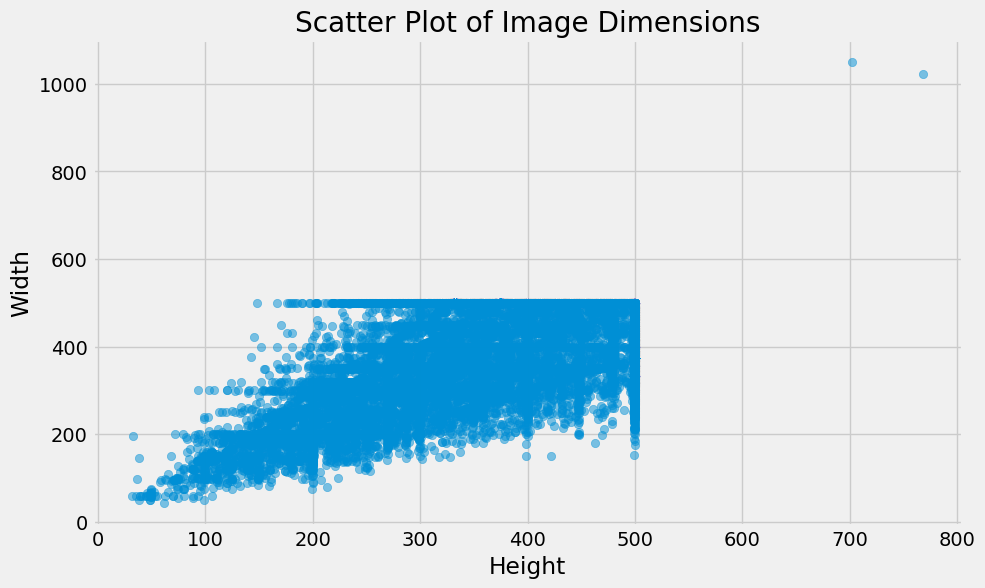

In [27]:
# Understanding the Spread of Images

# Scatter Plot:- Visualising the Distribution of Image Dimensions
plt.figure(figsize=(10, 6))
plt.style.use('fivethirtyeight')
plt.scatter(heights, widths, alpha=0.5)
plt.xlabel('Height')
plt.ylabel('Width')
plt.title('Scatter Plot of Image Dimensions')
plt.show()

- All Images Can be Seen within 500 X 500 Pixel Dimensions. (Excluding 2 outliers)

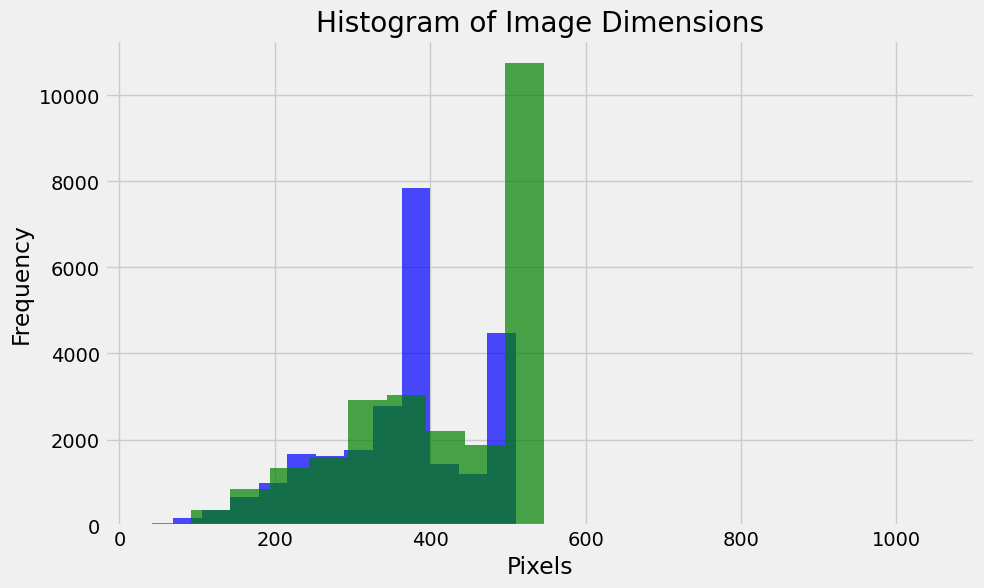

In [28]:
# Histogram:- Understanding Frequency of Specific Heights & Widths
plt.figure(figsize=(10, 6))
plt.style.use('fivethirtyeight')
plt.hist(heights, bins=20, color='blue', alpha=0.7)
plt.hist(widths, bins=20, color='green', alpha=0.7)
plt.xlabel('Pixels')
plt.ylabel('Frequency')
plt.title('Histogram of Image Dimensions')
plt.show()

- Both Heights & Widths of Images are Significantly Varied from Range 0 to 600 pixels
- Heights of Images Show 2 Peaks:-
  1. Images of 400 Pixel Height
  2. Images of 500 Pixel Height
- Widths of Images Shows 2 Patterns:-
  1. Images Show an Average Height of 400 Pixels.
  2. Images Show a Massive peak around 600 Pixels.

In [29]:
# Understanding Channels of Images
if len(unique_channels) == 1:
    print(f"All images have {list(unique_channels)[0]} channels.")
else:
    print("Images have different numbers of channels.")

All images have 3 channels.


- An Image Can Be Constructed from Color Channels or RGB Components.
- Each Channel is an Array of Pixel Values
- Number of Channels present in typical Images are:-
  1. 1 Channel - Grayscale Images
  2. 2 Channel - Grayscale Images with Alpha(Opacity)
  3. 3 Channel - RGB Images (Colored Images)
- Hence All Images in the Dataset are Colored.

## `Inference from EDA`

- Dataset is Balanced. Contains Equal Number of Cat & Dog Images.
- Dataset Contains Variety of Image Dimensions.
- All Images are Colored.

# `Visualising Images`

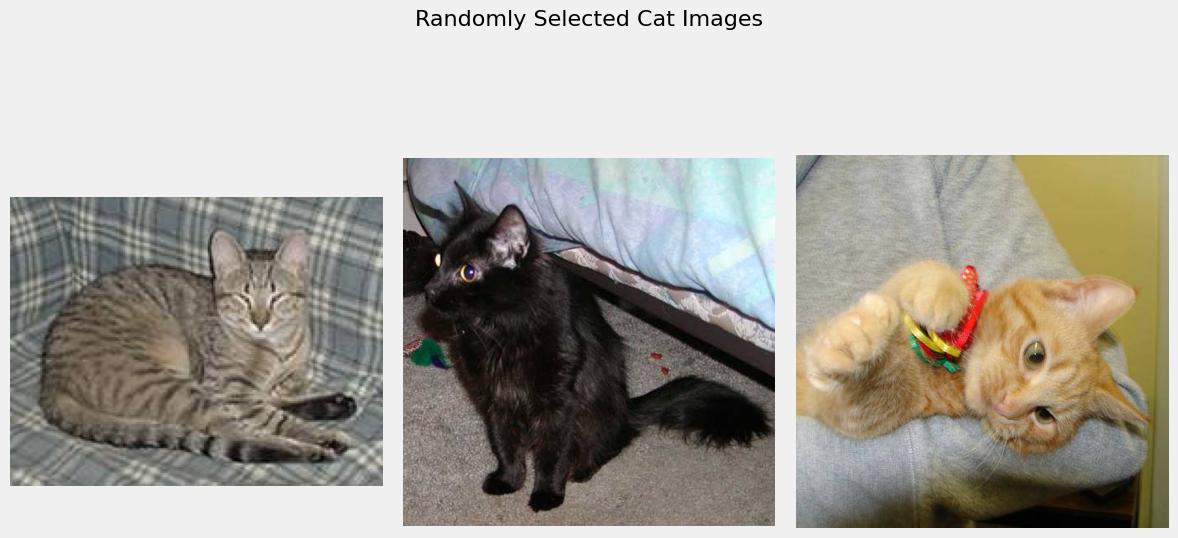

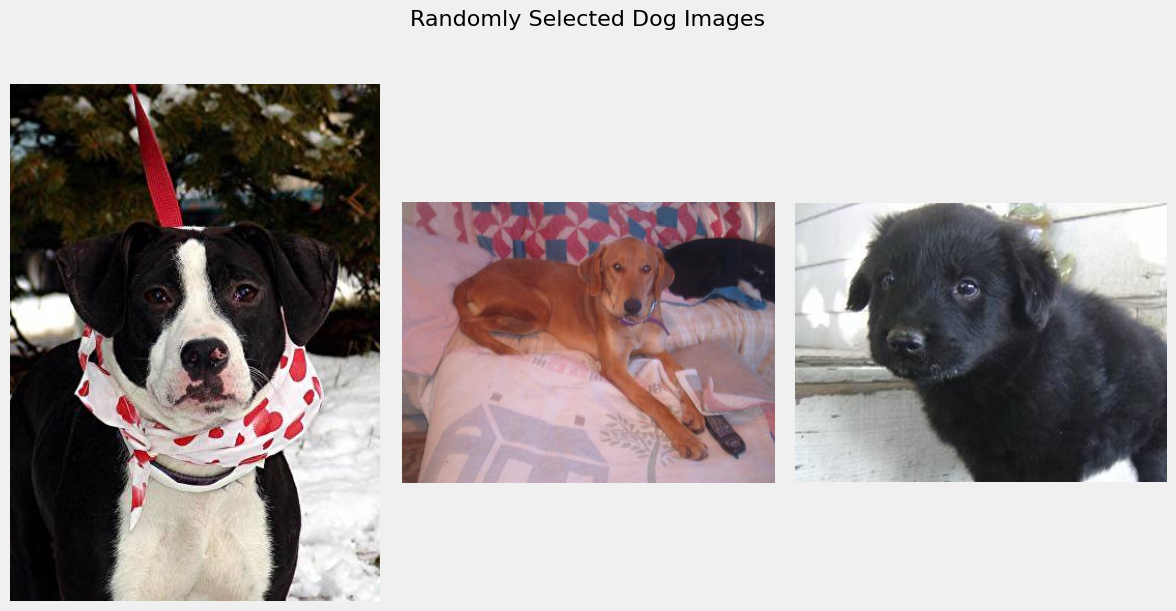

In [48]:
# Setting up Random Seed
np.random.seed(42)

# Randomly Selecting 3 Images from Each Category
random_cat_images = random.sample(cat_images, 3)
random_dog_images = random.sample(dog_images, 3)

# Function to Plot the Images
def plot_images(images, title):
    plt.figure(figsize=(12, 6))
    for i, image_name in enumerate(images):
        plt.subplot(1,3,i+1)
        img_path = os.path.join(image_dir, image_name)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img)
        plt.axis('off')
    plt.suptitle(title, fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()

# Plottting the Images
plot_images(random_cat_images, 'Randomly Selected Cat Images')
plot_images(random_dog_images, 'Randomly Selected Dog Images')

- Subplot of Randomly Selected Cat & Dog Images is Created for Visualisation.

# `Preparing Dataset`

In [31]:
# Creating a Centralised Dataframe for storing Filepaths & Respective Labels
Data = []

Data.extend([(os.path.join(image_dir, filename), 'cat') for filename in cat_images])
Data.extend([(os.path.join(image_dir, filename), 'dog') for filename in dog_images])

In [32]:
# Creating Dataframe
df = pd.DataFrame(Data, columns=['filepath', 'label'])
df.sample(5)

,filepath,label
6868,/kaggle/content\Assira Dataset\cat.493.jpg,cat
24016,/kaggle/content\Assira Dataset\dog.9112.jpg,dog
9668,/kaggle/content\Assira Dataset\cat.745.jpg,cat
13640,/kaggle/content\Assira Dataset\dog.11022.jpg,dog
14018,/kaggle/content\Assira Dataset\dog.11363.jpg,dog


## `Train-Test Split`

In [33]:
train, test_val = train_test_split(df, test_size=0.2, stratify=df['label'], random_state=42)
test, val = train_test_split(test_val, test_size=0.5, stratify=test_val['label'], random_state=42)

In [34]:
train.shape, test.shape, val.shape

((20000, 2), (2500, 2), (2500, 2))

In [35]:
target_distribution = test['label'].value_counts()
target_distribution.head(10)

label
dog    1250
cat    1250
Name: count, dtype: int64

In [36]:
df

,filepath,label
0,/kaggle/content\Assira Dataset\cat.0.jpg,cat
1,/kaggle/content\Assira Dataset\cat.1.jpg,cat
2,/kaggle/content\Assira Dataset\cat.10.jpg,cat
3,/kaggle/content\Assira Dataset\cat.100.jpg,cat
4,/kaggle/content\Assira Dataset\cat.1000.jpg,cat
...,...,...
24995,/kaggle/content\Assira Dataset\dog.9995.jpg,dog
24996,/kaggle/content\Assira Dataset\dog.9996.jpg,dog
24997,/kaggle/content\Assira Dataset\dog.9997.jpg,dog
24998,/kaggle/content\Assira Dataset\dog.9998.jpg,dog


## `Preprocessing Training Images for Model`

In [37]:
def preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (100, 100))
    img_flat = img.flatten()
    return img_flat

Created a Function Preprocessing Images which Performs:-
  1. Resizes All Images into 100 X 100 Pixel Resolution
  2. Flattening the Image into 1D Array for Further Processing.

In [38]:
X = []
y = df['label']
for filepath in df['filepath']:
    img_flat = preprocess_image(filepath)
    X.append(img_flat)
X = np.array(X)

In [39]:
print(f'Shape of X: {X.shape}')
print(f'Shape of y: {y.shape}')

Shape of X: (25000, 30000)
Shape of y: (25000,)


In [40]:
from sklearn.decomposition import IncrementalPCA

- For Fitting this Heavy Image Data onto ML Model We'll Use Principal Component Analysis.
- Regular PCA is out of Computation Range for Such Heavy Data.
- Hence We Used Incremental PCA.

In [41]:
# Use IncrementalPCA instead of PCA
n_components = 100  # Adjust as needed
ipca = IncrementalPCA(n_components=n_components, batch_size=100) #Adjust batch_size as needed

X_ipca = ipca.fit_transform(X)

# `Implementing SVM`

In [42]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_ipca, y, test_size=0.2, random_state=42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Data type of X_train: {type(X_train)}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Data type of y_train: {type(y_train)}")

Shape of X_train: (20000, 100)
Data type of X_train: <class 'numpy.ndarray'>
Shape of y_train: (20000,)
Data type of y_train: <class 'pandas.core.series.Series'>


- `X_train` is a Numpy Array, while `y_train` is a Pandas Series
- So to Avoid Further Inconsistencies.. converting `y_train` into numpy array.

In [43]:
y_train = y_train.to_numpy()  # Convert Pandas Series to NumPy array
print(f"Shape of y_train: {y_train.shape}")
print(f"Data type of y_train: {type(y_train)}")

Shape of y_train: (20000,)
Data type of y_train: <class 'numpy.ndarray'>


In [44]:
# Initialize and train the SVM classifier
svm_classifier = SVC(kernel='rbf', C=1.0, gamma='scale') # or any other suitable kernel
svm_classifier.fit(X_train, y_train)

SVC()

In [45]:
# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.676
[[1694  821]
 [ 799 1686]]
              precision    recall  f1-score   support

         cat       0.68      0.67      0.68      2515
         dog       0.67      0.68      0.68      2485

    accuracy                           0.68      5000
   macro avg       0.68      0.68      0.68      5000
weighted avg       0.68      0.68      0.68      5000



- Support Vector Classifier Shows an Accuracy of 67.6%.

In [46]:
#Saving Model
import joblib
joblib.dump(ipca, 'ipca_transformer.pkl')
joblib.dump(svm_classifier, 'svm_classifier.pkl')

['svm_classifier.pkl']

## `Making Real Time Prediction`

- Let's Test the Model's Capability by Testing it on a Randomly Downloaded Image.

Prediction: ['dog']
The Image is Classified as: Dog


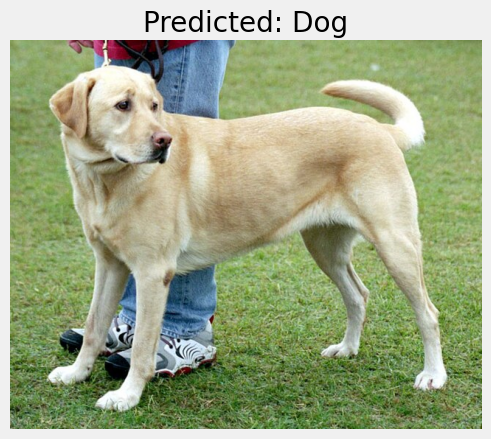

In [50]:
def preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (100, 100))
    img_flat = img.flatten()
    return img_flat

# Testing the Model on Randomly Downloaded Cat Image.
img_path = 'Dawg.jpg'
img_data = preprocess_image(img_path)
# print(f"Shape of Data :{img_data.shape}")

img_flat = img_flat.reshape(1, -1) 

# Loading Trained IPCA model
ipca = joblib.load('ipca_transformer.pkl')
img_data_transformed = ipca.transform([img_data])
# print(f"Shape After PCA :{img_data_transformed.shape}")
# print(f"Data type passed to SVM.predict: {type(img_data_transformed)}")

# if img_data_transformed.ndim == 3:
#     print(f"Original shape: {img_data_transformed.shape}")  # Debugging: check shape
#     img_data_transformed = img_data_transformed.reshape(img_data_transformed.shape[0], -1)
#     print(f"Flattened shape: {img_data_transformed.shape}")  # Should be 2D
# else:
#     print(f"No need to flatten; shape is already {img_data_transformed.shape}")

svm_classifier = joblib.load('svm_classifier.pkl')
# print(f"Expected features by SVM: {svm_classifier.n_features_in_}")

prediction = svm_classifier.predict(img_data_transformed)
print(f"Prediction: {prediction}")

# Output the Result
if prediction == 'cat':
    print("The Image is Classified as: Cat")
else:
    print("The Image is Classified as: Dog")

# Visualising the Image

# Read and convert the image
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image with prediction
plt.imshow(img_rgb)
plt.title(f"Predicted: {'Cat' if prediction[0] == 'cat' else 'Dog'}")
plt.axis('off')  # Turn off axes for better visualization
plt.show()